In [1]:
"""
FOR TESTING PURPOSES
"""
%load_ext autoreload
%autoreload 2

In [2]:
"""
Import relevant modules
"""

import pathlib

import SimpleITK as sitk
import numpy as np

from platipy.imaging.registration.registration import apply_field

from platipy.imaging.visualisation.tools import ImageVisualiser, project_onto_arbitrary_plane, generate_animation_from_image_sequence

from platipy.imaging.utils.tools import label_to_roi, get_com

from platipy.imaging.tests.pull_data import get_lung_data

"""
Deformation field operations
"""
from platipy.imaging.deformation_fields.deformation_field_operations import (
get_bone_mask,
get_external_mask,
generate_field_shift,
generate_field_asymmetric_contract,
generate_field_asymmetric_extend,
generate_field_expand,
generate_field_radial_bend
)

%matplotlib notebook

In [3]:
"""
Read in some images and structures for this demonstration
We are using a lung radiotherapy dataset comprising CT and RTSTRUCT
"""

image_ct = sitk.ReadImage("../../imaging/tests/data/LCTSC/LCTSC-Test-S1-101/CT.nii.gz")

structure_list = ["Heart", "Esophagus", "Lung_L", "Lung_R", "SpinalCord"]
label_images = {i:sitk.ReadImage(f"../../imaging/tests/data/LCTSC/LCTSC-Test-S1-101/Struct_{i}.nii.gz") for i in structure_list}

In [4]:
external_mask = get_external_mask(image_ct, dilate=5)

In [15]:
label_expand, expand_transform, expand_dvf = generate_field_radial_bend(
    image_ct,
    external_mask,
    reference_point=get_com(label_images["Heart"]),
    axis_of_rotation=[0,0,1],
    scale=0.5
)

In [16]:
interp_list = np.linspace(0, 1, 10)
image_list = []
scalar_list = []

for index, interp_value in enumerate(interp_list):
    
    print(index, interp_value)
    

    """
    Generate interpolated DVF
    """

    expand_dvf_interpolate = sitk.Compose(*[float(interp_value)*sitk.VectorIndexSelectionCast(expand_dvf, i, sitk.sitkFloat64) for i in [0,1,2]])
    expand_transform_interpolate = sitk.DisplacementFieldTransform( expand_dvf_interpolate )

    #print("  Interpolation complete.")

    """
    Generate deformed and projected image
    """

    im_deform = apply_field(image_ct, expand_transform_interpolate, interp=2)


    im_project = project_onto_arbitrary_plane(
        im_deform,
        projection_name='mean',
        rotation_axis=[0,0,1],
        rotation_angle=0,
        projection_axis=0
    )

    image_list.append(im_project)
    
    #print("  Deformation and projection complete.")

#     """
#     Generate deformed and projected scalar field (Heart contour)
#     """

#     scalar_deform = apply_field(label_images["Lung_L"]+label_images["Lung_R"], expand_transform_interpolate, structure=True, default_value=0, interp=1)

#     scalar_rotate = project_onto_arbitrary_plane(
#         scalar_deform,
#         projection_name='mean',
#         rotation_axis=[0,0,1],
#         rotation_angle=0,
#         projection_axis=1
#     )

#     scalar_list.append(scalar_rotate)

0 0.0
1 0.1111111111111111
2 0.2222222222222222
3 0.3333333333333333
4 0.4444444444444444
5 0.5555555555555556
6 0.6666666666666666
7 0.7777777777777777
8 0.8888888888888888
9 1.0


<IPython.core.display.Javascript object>


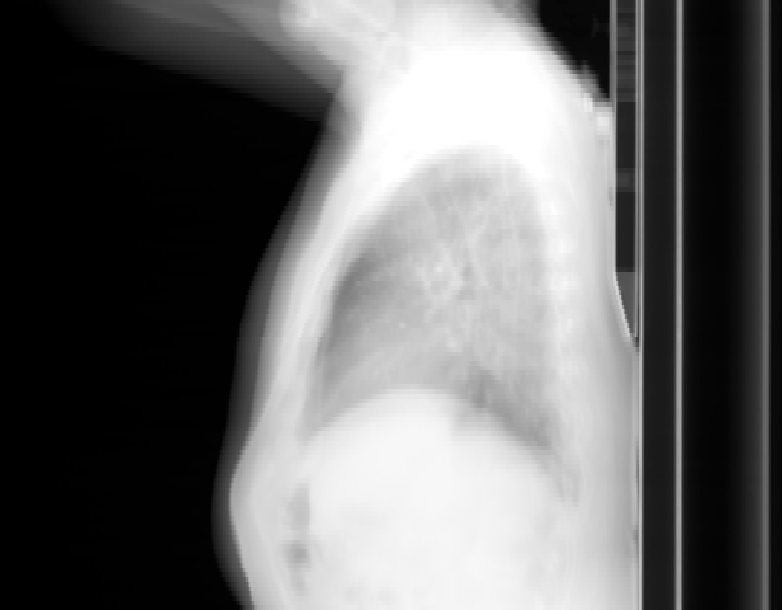

In [17]:
animation = generate_animation_from_image_sequence(image_list + image_list[::-1], "animation_twist.gif", scalar_list=False, fps=25)

In [ ]:
angle_list = np.linspace(0, np.pi*2, 50)
image_list = []
contour_list = []
scalar_list = []

for angle in angle_list:
    im_rotate = project_onto_arbitrary_plane(
        image_ct,
        projection_name='mean',
        rotation_axis=[0,0,1],
        rotation_angle=angle,
        projection_axis=1
    )
    image_list.append(im_rotate)
    
    contour_rotate_lung_l = project_onto_arbitrary_plane(
        label_images["Lung_L"],
        projection_name='max',
        rotation_axis=[0,0,1],
        rotation_angle=angle,
        projection_axis=1,
        resample_interpolation=1,
        default_value=0    
    )
    
    contour_rotate_lung_r= project_onto_arbitrary_plane(
        label_images["Lung_R"],
        projection_name='max',
        rotation_axis=[0,0,1],
        rotation_angle=angle,
        projection_axis=1,
        resample_interpolation=1,
        default_value=0    
    )
    
    contour_list.append({"LUNG L": contour_rotate_lung_l, "LUNG R": contour_rotate_lung_r})
    
    scalar_rotate =  project_onto_arbitrary_plane(
        label_images["Heart"],
        projection_name='mean',
        rotation_axis=[0,0,1],
        rotation_angle=angle,
        projection_axis=1,
        resample_interpolation=1,
        default_value=0    
    )
    
    combined_scalar = 1*contour_rotate_lung_l + 2*contour_rotate_lung_r + 3+scalar_rotate
    
    scalar_list.append(scalar_rotate)

In [ ]:
animation = generate_animation_from_image_sequence(image_list, contour_list=contour_list, scalar_list=scalar_list, scalar_alpha=1, scalar_min=0.01, fps=12.5)

All factors positive: expansion only.


In [ ]:
interp_list = np.linspace(0, 1, 25)
image_list = []
scalar_list = []

for index, interp_value in enumerate(interp_list):
    
    print(index, interp_value)
    

    """
    Generate interpolated DVF
    """

    expand_dvf_interpolate = sitk.Compose(*[float(interp_value)*sitk.VectorIndexSelectionCast(expand_dvf, i, sitk.sitkFloat64) for i in [0,1,2]])
    expand_transform_interpolate = sitk.DisplacementFieldTransform( expand_dvf_interpolate )

    #print("  Interpolation complete.")

    """
    Generate deformed and projected image
    """

    im_deform = apply_field(image_ct, expand_transform_interpolate, interp=2)


    im_project = project_onto_arbitrary_plane(
        im_deform,
        projection_name='mean',
        rotation_axis=[0,0,1],
        rotation_angle=0,
        projection_axis=1
    )

    image_list.append(im_project)
    
    #print("  Deformation and projection complete.")

    """
    Generate deformed and projected scalar field (Heart contour)
    """

    scalar_deform = apply_field(label_images["Lung_L"]+label_images["Lung_R"], expand_transform_interpolate, structure=True, default_value=0, interp=1)

    scalar_rotate = project_onto_arbitrary_plane(
        scalar_deform,
        projection_name='mean',
        rotation_axis=[0,0,1],
        rotation_angle=0,
        projection_axis=1
    )

    scalar_list.append(scalar_rotate)